# CIVL 547 - Assignment 5
Salt Wedges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Question 1

In [2]:
Qr = [1000,3000,10000,30000]
B = 1000
H = 10
c = 1.61

In [3]:
Fr2 = [(q/(B*H*c))**2 for q in Qr]

for i in range(len(Fr2)):
    if Fr2[i] > 1:
        print("at Qr="+str(Qr[i])+" m3/s, the estuary is flushed")
    else:
        print("at Qr="+str(Qr[i])+" m3/s, the estuary is NOT flushed")

at Qr=1000 m3/s, the estuary is NOT flushed
at Qr=3000 m3/s, the estuary is NOT flushed
at Qr=10000 m3/s, the estuary is NOT flushed
at Qr=30000 m3/s, the estuary is flushed


#### Question 3
makes more sense to do question 3 before question 2 in terms of code

In [4]:
Qr = [1000,3000,10000]
fi = 0.001
Fr = [(q/(B*H*c)) for q in Qr]

#non dimensional length
lam = [1/10 - F**2 +(3/2)*F**(8/3) - (3/5)*F**(10/3) for F in Fr]

#length
Ls = [(H/fi)*(1/(10*F**2)-1+(3/2)*F**(2/3)-(3/5)*F**(4/3)) for  F in Fr]

Text(0.5, 0, 'River Flow Rate [m3/s]')

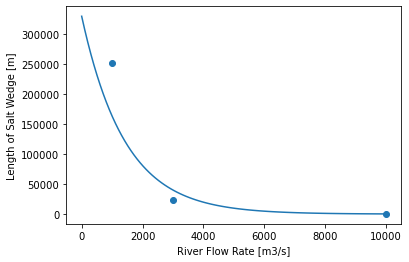

In [5]:
#data with an exponential line of best fit

log_y = np.log(Ls)
x = np.linspace(0,10000,100)

m, b = np.polyfit(Qr, log_y, 1)
y = np.exp(b) * np.exp(m*x)

plt.scatter(Qr, Ls) #actual data
plt.plot(x,y) #constructed line of best fit
plt.ylabel('Length of Salt Wedge [m]')
plt.xlabel('River Flow Rate [m3/s]')

#### Question 2

In [39]:
#first with Qr = 1000
z = np.linspace(-H, 0, 250)
x1 = np.linspace(Ls[0],0, 250) #based on extent of salt wedge
X = np.linspace(0,1, 250) #non dimensional X = x/Ls

In [40]:
F = Fr[0]
C = (2/lam[0])*((F**2)/2-(1/4)+(1/5)) #solve for the constant from the integral
#C = -F**2-(1/10)

In [41]:
C

-0.9912297500516127

In [42]:
#try to set up loop to solve for sigma at different points upstream of the mouth
eta =  np.empty(np.shape(x1))

for i in range(len(eta)):
    coeff = [1/5, -1/4, 0, -(F**2)/2, (F**2), -(lam[0]/2)*(X[i]+C)] #my equation
    #coeff = [1/5, -1/4, 0, -(F**2)/2, (F**2), C-lam[0]*X[i]] #equation 13
    if len(np.roots(coeff)[np.isreal(np.roots(coeff))])>1:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]
    else:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]

height1 = H-H*eta

<ipython-input-42-0a16ca345faf>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]
<ipython-input-42-0a16ca345faf>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]


In [47]:
#force a solutoin that makes sense at the mouth
height1[-1]=height1[-2]+(height1[-2]-height1[-3])

Text(0.5, 0, 'Distance into the estuary [m]')

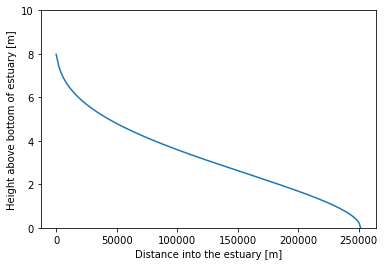

In [48]:
plt.plot(x1, height1)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')

In [49]:
#Qr = 3000
z = np.linspace(-H, 0, 250)
x2 = np.linspace(Ls[1],0, 250) #based on extent of salt wedge
X = np.linspace(0,1, 250) #non dimensional X = x/Ls

F = Fr[1]
C = (2/lam[1])*((F**2)/2-(1/4)+(1/5)) #solve for the constant from the integral

In [59]:
#try to set up loop to solve for sigma at different points upstream of the mouth
eta =  np.empty(np.shape(x1))

for i in range(len(eta)):
    coeff = [1/5, -1/4, 0, -(F**2)/2, (F**2), -(lam[1]/2)*(X[i]+C)]
    if len(np.roots(coeff)[np.isreal(np.roots(coeff))])>1:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]
    else:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]

#for whattever reason got to force some shit
eta[0] = 1
height2 = H-H*eta
height2[-1]=height2[-2]+(height2[-2]-height2[-3])

<ipython-input-59-1c1ec467295d>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]
<ipython-input-59-1c1ec467295d>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]


Text(0.5, 0, 'Distance into the estuary [m]')

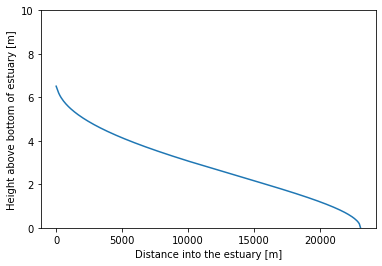

In [60]:
plt.plot(x2,height2)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')

In [61]:
#Qr = 3000
z = np.linspace(-H, 0, 250)
x3 = np.linspace(Ls[2],0, 250) #based on extent of salt wedge
X = np.linspace(-1,0, 250) #non dimensional X = x/Ls

F = Fr[2]
C = (2/lam[2])*((F**2)/2-(1/4)+(1/5))+1 #solve for the constant from the integral

In [65]:
#try to set up loop to solve for sigma at different points upstream of the mouth
eta =  np.empty(np.shape(x1))

for i in range(len(eta)):
    coeff = [1/5, -1/4, 0, -(F**2)/2, (F**2), -(lam[2]/2)*(X[i]+C)]
    if len(np.roots(coeff)[np.isreal(np.roots(coeff))])>1:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]
    else:
        eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]

eta[0] = 1
height3 = H-H*eta
height3[-1]=height3[-2]+(height3[-2]-height3[-3])

<ipython-input-65-5ffe675116b1>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][1]
<ipython-input-65-5ffe675116b1>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[i]=np.roots(coeff)[np.isreal(np.roots(coeff))][0]


Text(0.5, 0, 'Distance into the estuary [m]')

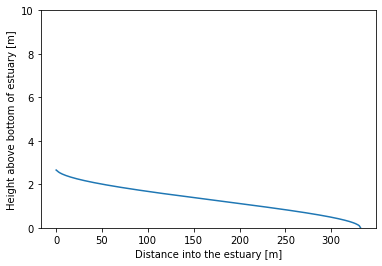

In [66]:
plt.plot(x3,height3)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')

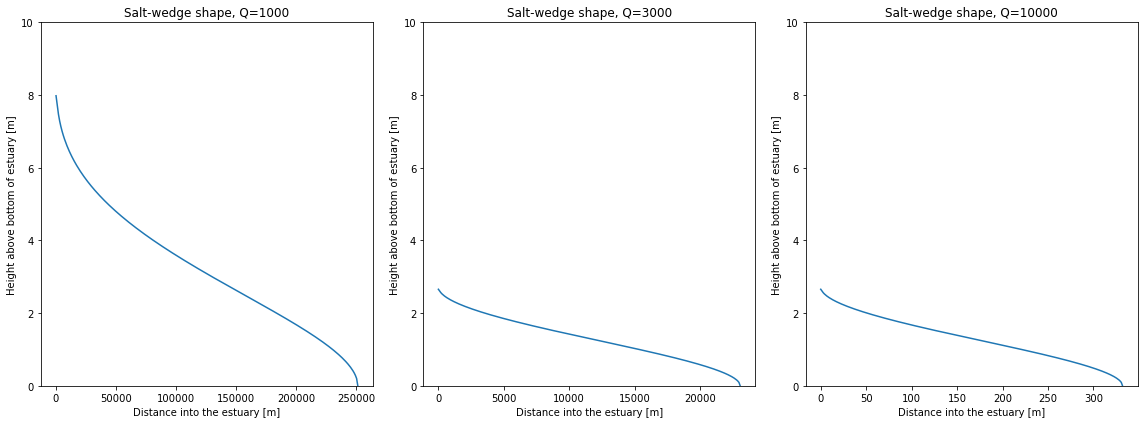

In [67]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.plot(x1, height1)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')
plt.title('Salt-wedge shape, Q=1000')

plt.subplot(1,3,2)
plt.plot(x2, height2)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')
plt.title('Salt-wedge shape, Q=3000')

plt.subplot(1,3,3)
plt.plot(x3, height3)
plt.ylim(0,10)
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')
plt.title('Salt-wedge shape, Q=10000')

plt.tight_layout()

Text(0.5, 0, 'Distance into the estuary [m]')

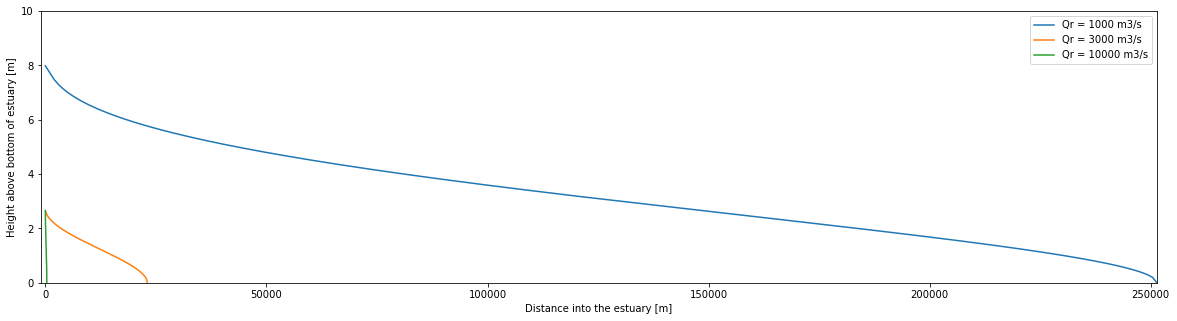

In [69]:
plt.figure(figsize = (20,5))
plt.plot(x1,height1, label='Qr = 1000 m3/s')
plt.plot(x2,height2, label='Qr = 3000 m3/s')
plt.plot(x3,height3, label='Qr = 10000 m3/s')
plt.ylim(0,10)
plt.xlim(-1000, Ls[0])
plt.legend()
plt.ylabel('Height above bottom of estuary [m]')
plt.xlabel('Distance into the estuary [m]')

#### Question 4

In [31]:
Ls = 25*1000
H = 10
B = 500 #assume W=B
Qr = 1000
Fr = Qr/(B*H*c)

fi = (H/Ls)*(1/(10*Fr**2)-1+(3/2)*Fr**(2/3)-(3/5)*Fr**(4/3))
print(fi)

0.0023266023320555177
